In [0]:
import os
import sys
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from nst_utils import *
import numpy as np
import tensorflow as tf

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [96]:
import os
#os.chdir('drive/My Drive/Colab Notebooks/Paper/Neural Style transfer')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Paper/Neural Style transfer'

In [97]:
model = load_vgg_model("pretrained-model/imagenet-vgg-verydeep-19.mat")
print(model)

{'input': <tf.Variable 'Variable:0' shape=(1, 300, 400, 3) dtype=float32_ref>, 'conv1_1': <tf.Tensor 'Relu:0' shape=(1, 300, 400, 64) dtype=float32>, 'conv1_2': <tf.Tensor 'Relu_1:0' shape=(1, 300, 400, 64) dtype=float32>, 'avgpool1': <tf.Tensor 'AvgPool:0' shape=(1, 150, 200, 64) dtype=float32>, 'conv2_1': <tf.Tensor 'Relu_2:0' shape=(1, 150, 200, 128) dtype=float32>, 'conv2_2': <tf.Tensor 'Relu_3:0' shape=(1, 150, 200, 128) dtype=float32>, 'avgpool2': <tf.Tensor 'AvgPool_1:0' shape=(1, 75, 100, 128) dtype=float32>, 'conv3_1': <tf.Tensor 'Relu_4:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_2': <tf.Tensor 'Relu_5:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_3': <tf.Tensor 'Relu_6:0' shape=(1, 75, 100, 256) dtype=float32>, 'conv3_4': <tf.Tensor 'Relu_7:0' shape=(1, 75, 100, 256) dtype=float32>, 'avgpool3': <tf.Tensor 'AvgPool_2:0' shape=(1, 38, 50, 256) dtype=float32>, 'conv4_1': <tf.Tensor 'Relu_8:0' shape=(1, 38, 50, 512) dtype=float32>, 'conv4_2': <tf.Tensor 'Relu_9:0' shap

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


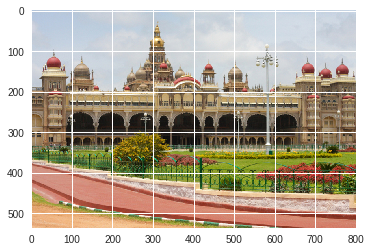

In [128]:
content_image = scipy.misc.imread("Images/content3.jpg")
imshow(content_image)

In [0]:
def compute_content_cost(a_C, a_G):
    
    
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    
    a_C_unrolled = tf.transpose(tf.reshape(a_C,[-1]))
    a_G_unrolled = tf.transpose(tf.reshape(a_G,[-1]))
    
    
    J_content = tf.reduce_sum((a_C_unrolled-a_G_unrolled)**2)/(4*n_H*n_W*n_C)
    
    
    return J_content

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


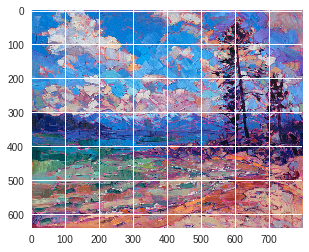

In [141]:
style_image = scipy.misc.imread("Images/style3.jpg")
imshow(style_image)

In [0]:
def gram_matrix(A):
    
    GA = tf.matmul(A,tf.transpose(A))
   
    return GA

In [0]:
def compute_layer_style_cost(a_S, a_G):
   
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
   
    a_S = tf.reshape(tf.transpose(a_S, perm = [0, 3, 1, 2]), [n_C, n_H * n_W])
    a_G = tf.reshape(tf.transpose(a_G, perm = [0, 3, 1, 2]), [n_C, n_H * n_W])
    
    GS = gram_matrix(a_S)
    GG = gram_matrix(a_G)

    
    J_style_layer = tf.reduce_sum(tf.squared_difference(GS, GG)) / (4 * n_C**2 * (n_W * n_H)**2)
       
    return J_style_layer

In [0]:
def compute_style_cost(model, STYLE_LAYERS):
   
    J_style = 0

    for layer_name, coeff in STYLE_LAYERS:

        
        out = model[layer_name]
        a_S = sess.run(out)

        a_G = out
        
        J_style_layer = compute_layer_style_cost(a_S, a_G)

        J_style += coeff * J_style_layer

    return J_style

In [0]:
def total_cost(J_content, J_style, alpha = 10, beta = 30):
    
    J = alpha * J_content + beta * J_style
    
    return J

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RG

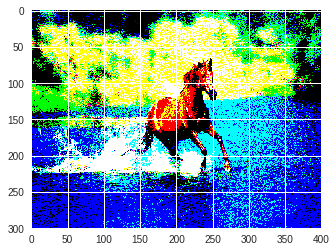

In [232]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

content_image = scipy.misc.imread("Images/content6.png")
content_image = reshape_and_normalize_image(content_image)

style_image = scipy.misc.imread("Images/style6.png")
style_image = reshape_and_normalize_image(style_image)

generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [0]:
model = load_vgg_model("pretrained-model/imagenet-vgg-verydeep-19.mat")


In [0]:
sess.run(model['input'].assign(content_image))

out = model['conv4_2']
a_C = sess.run(out)
a_G = out

J_content = compute_content_cost(a_C, a_G)

In [241]:
img_path = 'Images/content6.jpg'
img = image.load_img(img_path, target_size=(300, 400))      #To resize the content and style images for the required size
#img.reshape(1,300,400)
x = image.img_to_array(img)
x.shape


(300, 400, 3)

In [0]:
img.save('Images/content6.png')

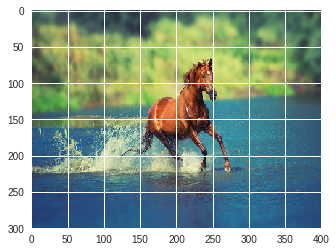

In [231]:
imshow(img)

In [0]:
sess.run(model['input'].assign(style_image))

J_style = compute_style_cost(model, STYLE_LAYERS)

In [0]:
STYLE_LAYERS = [
    ('conv1_1', 0.2),
    ('conv2_1', 0.2),
    ('conv3_1', 0.2),
    ('conv4_1', 0.2),
    ('conv5_1', 0.2)]

In [0]:
J = total_cost(J_content, J_style, alpha = 10, beta = 40)

In [0]:
optimizer = tf.train.AdamOptimizer(2.0)

train_step = optimizer.minimize(J)

In [0]:
def model_nn(sess, input_image, num_iterations = 200):
    
   
    sess.run(tf.global_variables_initializer())
   
    sess.run(model['input'].assign(input_image))
   
    
    for i in range(num_iterations):
        sess.run(train_step)
        generated_image = sess.run(model['input'])
        
        if i%20 == 0:
            Jt, Jc, Js = sess.run([J, J_content, J_style])
            print("Iteration " + str(i) + " :")
            print("total cost = " + str(Jt))
            print("content cost = " + str(Jc))
            print("style cost = " + str(Js))
                        
            save_image("output/6/" + str(i) + ".png", generated_image)
    
    save_image('output/6/generated_image.jpg', generated_image)
    
    return generated_image

In [240]:
model_nn(sess, generated_image)

Iteration 0 :
total cost = 21082792000.0
content cost = 6975.457
style cost = 527068060.0
Iteration 20 :
total cost = 3420654600.0
content cost = 21029.254
style cost = 85511110.0
Iteration 40 :
total cost = 1245392900.0
content cost = 23887.086
style cost = 31128852.0
Iteration 60 :
total cost = 726310200.0
content cost = 24891.47
style cost = 18151532.0
Iteration 80 :
total cost = 520225600.0
content cost = 25414.32
style cost = 12999286.0
Iteration 100 :
total cost = 407952600.0
content cost = 25834.602
style cost = 10192357.0
Iteration 120 :
total cost = 335331840.0
content cost = 26171.021
style cost = 8376754.0
Iteration 140 :
total cost = 285036480.0
content cost = 26470.648
style cost = 7119294.0
Iteration 160 :
total cost = 247415400.0
content cost = 26698.574
style cost = 6178710.0
Iteration 180 :
total cost = 218278670.0
content cost = 26898.828
style cost = 5450242.0


array([[[[  -8.570868  ,  -77.4478    , -150.99084   ],
         [ -28.642458  ,  -53.327984  ,  -60.49757   ],
         [  78.4891    ,  -55.49566   ,  -43.266853  ],
         ...,
         [ -82.75779   ,  -30.362839  ,  -55.14015   ],
         [ -22.818449  ,  -36.37739   ,  -96.187965  ],
         [ -30.540363  , -113.80322   ,  -29.118044  ]],

        [[ -33.231007  ,  -58.640816  ,  -60.580482  ],
         [ -39.09152   ,  -46.95805   ,  -55.20999   ],
         [  55.127064  ,  -14.727561  ,  -49.5462    ],
         ...,
         [  55.638508  ,  -10.822248  ,  -25.463642  ],
         [  58.173042  ,   -7.131191  ,  -27.162611  ],
         [   6.2977777 ,  -28.53727   ,    3.0303526 ]],

        [[ -43.232533  ,  -92.44445   ,  -49.516365  ],
         [  -2.4012394 ,  -76.787384  ,  -50.24173   ],
         [  22.287304  ,   -2.515073  ,  -51.25891   ],
         ...,
         [  72.19334   ,   13.622822  ,   -3.0327156 ],
         [  58.98742   ,  -24.432638  ,  -26.919764  ],
  